# Topic Modeling for all rumor tweets of sydney siege

File used:
- combined_rumor_target.csv

# Load library & data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# !pip install pyLDAvis
import pyLDAvis.gensim_models
from pprint import pprint

In [ ]:
# from google.colab import drive
# import os
# drive.mount('/content/drive')

In [8]:
# load rumor data
combined_data = pd.read_csv('sydneysiege/18 analysis/combined_rumor_target.csv',header = 0,index_col = 0,encoding = 'utf-8')
combined_data.head(1)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet_id,user_id,date,rumorlabel,tweet,cleaned_text,targetlabel,sentiment,src_reply
0,544269152198721536,443573208,Sun Dec 14 23:14:12 +0000 2014,1,@KristyMayr7 that is not an IS flag specifically.,not flag specifically,0,Neutral,reply


In [9]:
combined_data.shape

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7870, 9)

In [14]:
combined_data.targetlabel.value_counts()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    5843
1    2027
Name: targetlabel, dtype: int64

# LDA modeling

[report](https://docs.google.com/spreadsheets/d/1MxoVkvCgLIHDSn_I_te9wZIXjlFQDb-fe8FhXAfGy8Y/edit?usp=sharing)

In [3]:
from nltk import word_tokenize, corpus
import gensim
from gensim import corpora,models
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import remove_stopwords

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [4]:
import nltk
nltk.download('punkt')

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [10]:
target_tw = combined_data.loc[combined_data.targetlabel==1,'cleaned_text']
nontarget_tw = combined_data.loc[combined_data.targetlabel==0,'cleaned_text']

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
target_tw_list = target_tw.apply(word_tokenize).tolist()
nontarget_tw_list = nontarget_tw.apply(word_tokenize).tolist()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Target

In [12]:
#Rumor dictionary
id2word = corpora.Dictionary(target_tw_list)
print(id2word)

Dictionary(4411 unique tokens: ['dudes', 'flag', 'isis', 'not', 'use']...)


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# Term Document Frequency
corpus_target = [id2word.doc2bow(tw) for tw in target_tw_list]

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
def compute_coherence_values(corpus, dictionary, k):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10)
    
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=target_tw_list, 
                                         dictionary=id2word,    
                                         coherence='c_v')
    return coherence_model_lda.get_coherence()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# Topics range
min_topics = 2
max_topics = 20
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
target_results ={'Topics': [], 'Coherence': []}

for k in topics_range:

    # get the coherence score for the given parameters
    cv = compute_coherence_values(corpus=corpus_target, 
                                  dictionary=id2word,k=k)
    # Save the model results
    target_results['Topics'].append(k)
    target_results['Coherence'].append(cv)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
target_results = pd.DataFrame(target_results)
target_results

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topics,Coherence
0,2,0.202943
1,3,0.250643
2,4,0.318268
3,5,0.320396
4,6,0.300456
5,7,0.309052
6,8,0.287034
7,9,0.345960
8,10,0.390540
9,11,0.307550


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


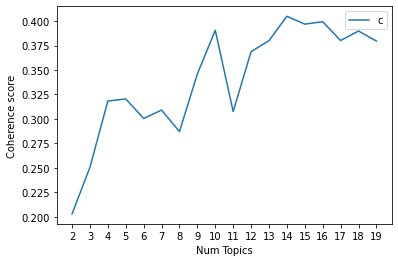

In [22]:
# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(target_results.Topics, target_results.Coherence)
plt.xticks(x)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

### choose the number of topics: **10**

In [23]:
lda_model_target = gensim.models.LdaMulticore(corpus=corpus_target,id2word=id2word,num_topics=10, 
                                       random_state=100,chunksize=100,passes=10)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
target_topics = pyLDAvis.gensim_models.prepare(lda_model_target,corpus_target,id2word)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [25]:
pyLDAvis.display(target_topics)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
save_path = 'sydneysiege/18 targetanalysis/twanalysis\\'
pyLDAvis.save_html(target_topics, save_path+'sydneysiege_lda_target.html')

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Non-Target

In [28]:
#Rumor dictionary
id2word_non = corpora.Dictionary(nontarget_tw_list)
print(id2word_non)

Dictionary(6356 unique tokens: ['flag', 'not', 'specifically', 'im', 'omg']...)


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
# Term Document Frequency
corpus_nontarget = [id2word_non.doc2bow(tw) for tw in nontarget_tw_list]

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
def compute_coherence_values(corpus, dictionary, k):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10)
    
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=nontarget_tw_list, #要改
                                         dictionary=id2word_non,    #要改
                                         coherence='c_v')
    return coherence_model_lda.get_coherence()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# Topics range
min_topics = 2
max_topics = 20
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
nontarget_results ={'Topics': [], 'Coherence': []}

for k in topics_range:

    # get the coherence score for the given parameters
    cv = compute_coherence_values(corpus=corpus_nontarget, 
                                  dictionary=id2word_non,k=k)
    # Save the model results
    nontarget_results['Topics'].append(k)
    nontarget_results['Coherence'].append(cv)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
nontarget_results = pd.DataFrame(nontarget_results)
nontarget_results

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topics,Coherence
0,2,0.344901
1,3,0.448419
2,4,0.393968
3,5,0.421440
4,6,0.453817
5,7,0.441003
6,8,0.386462
7,9,0.396510
8,10,0.474716
9,11,0.386482


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


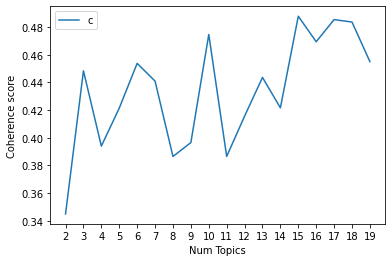

In [34]:
# Show graph
import matplotlib.pyplot as plt
x = range(min_topics, max_topics, step_size)

plt.plot(nontarget_results.Topics, nontarget_results.Coherence)
plt.xticks(x)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

### choose the number of topics: **3**

In [35]:
lda_model_nontarget = gensim.models.LdaMulticore(corpus=corpus_nontarget,id2word=id2word_non,num_topics=3, 
                                       random_state=100,chunksize=100,passes=10)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
nontarget_topics = pyLDAvis.gensim_models.prepare(lda_model_nontarget,corpus_nontarget,id2word_non)
pyLDAvis.display(nontarget_topics)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [37]:
save_path =  'D:/論文/PHEME9/Code/sydneysiege/18 targetanalysis/twanalysis\\'
pyLDAvis.save_html(nontarget_topics, save_path+'sydneysiege_lda_nontarget.html')

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# BERTopic

In [42]:
!pip install bertopic

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached bertopic-0.13.0-py2.py3-none-any.whl (103 kB)
  Using cached hdbscan-0.8.29.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached umap-learn-0.5.3.tar.gz (88 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


ERROR: No .egg-info directory found in C:\Users\user\AppData\Local\Temp\pip-pip-egg-info-qo505772


In [41]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True,nr_topics="auto")

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ModuleNotFoundError: No module named 'bertopic'

In [39]:
target_docs = combined_data.loc[combined_data.targetlabel==1,'cleaned_text'].to_list()
nontarget_docs = combined_data.loc[combined_data.targetlabel==0,'cleaned_text'].to_list()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
print("# of target tweets: {}".format(len(target_docs)) )
print("# of non-target tweets: {}".format(len(nontarget_docs)) )

# of target tweets: 2027
# of non-target tweets: 5843


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Target tweets

In [ ]:
topics, probs = topic_model.fit_transform(target_docs)

In [ ]:
topic_model.get_topic_freq().head(11)

In [ ]:
topic_words = topic_model.get_topics()
topiclist = []
for topic in range(10):
  wordlist = []
  for words in range(10):
        wordlist.append(topic_words[topic][words][0])
  topiclist.append(wordlist)

In [ ]:
df = pd.DataFrame(topiclist)

In [ ]:
df

In [ ]:
fig = topic_model.visualize_barchart(n_words=10,top_n_topics=10)
fig

## Non-Target

In [ ]:
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True,nr_topics="auto")
topics, probs = topic_model.fit_transform(nontarget_docs)

In [ ]:
topic_model.get_topic_freq().sort_values(['Topic'])

In [ ]:
topic_words = topic_model.get_topics()
topiclist = []
for topic in range(13):
  wordlist = []
  for words in range(10):
        wordlist.append(topic_words[topic][words][0])
  topiclist.append(wordlist)

In [ ]:
nontarget_df = pd.DataFrame(topiclist)

In [ ]:
nontarget_df

In [ ]:
nontarget_fig = topic_model.visualize_barchart(n_words=10,top_n_topics=13)
nontarget_fig

# GSDMM
[ref](https://towardsdatascience.com/short-text-topic-modeling-70e50a57c883)



In [ ]:
!git clone https://github.com/rwalk/gsdmm.git
import sys
sys.path.append('/content/gsdmm')

In [ ]:
from gsdmm import MovieGroupProcess
mgp = MovieGroupProcess(K=7, alpha=0.1, beta=0.1, n_iters=20)

In [ ]:
vocab = set(x for doc in target_tw_list for x in doc)
n_terms = len(vocab)
y = mgp.fit(target_tw_list, n_terms)

In [ ]:
def top_words(distribution, top_index, num_words):
    for topic in top_index:
        pairs = sorted([(k, v) for k, v in distribution[topic].items()], key=lambda x: x[1], reverse=True)
        print(f"Cluster {topic} : {pairs[:num_words]}")
        print('-'*30)

In [ ]:
doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic :', doc_count)
print('*'*20)
# Topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-10:][::-1]
print('Most important clusters (by number of docs inside):', top_index)
print('*'*20)
# Show the top 5 words in term frequency for each cluster 
top_words(mgp.cluster_word_distribution, top_index, 20)





# Save

In [ ]:
save_path = r'D:\論文\PHEME9\Code\sydneysiege\18 targetanalysis\twanalysis\\'
pyLDAvis.save_html(nontarget_topics, save_path+'sydneysiege_lda_nontarget.html')